In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
df = pd.read_csv('Google_Stock_Price_Train.csv')


In [22]:
df.shape

(1258, 6)

In [23]:
df.head(10)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [32]:
x = int(len(df)*0.8)
x

1006

In [29]:
def get_middle(df,percent):

    start = int(len(df)*percent)
    end = len(df)

    return df.iloc[start:end]

df_test=get_middle(df,0.80)

In [31]:
df_test.shape

(252, 6)

In [ ]:
x

In [43]:
data_train = df.iloc[0:x,:]

In [45]:
data_train.shape

(1006, 6)

In [46]:
data_test = df.iloc[x:len(df),:]

In [48]:
data_test.shape

(252, 6)

In [49]:
training_set = df_train.iloc[:, 1:2].values

In [56]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values


In [57]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [58]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [59]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [61]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 40, batch_size = 32)


Epoch 1/40
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0528
Epoch 2/40
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0068
Epoch 3/40
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0060
Epoch 4/40
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0057
Epoch 5/40
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 6/40
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 7/40
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 8/40
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 9/40
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 10/40
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0061
Epoch 11/40
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 12/40
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0039


In [63]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

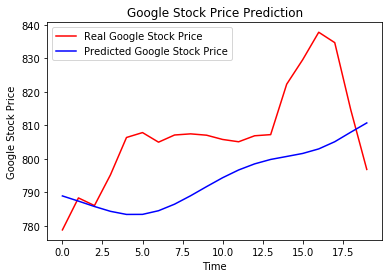

In [64]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()